# 1.提出问题
 
- 哪些化学特性在预测葡萄酒质量方面最为重要？
- 是否特定类型的葡萄酒（红葡萄酒或白葡萄酒）的品质更高？
- 酒精含量更高的葡萄酒是否获得的评价更高？
- 味道更甜（残糖更多）的葡萄酒是否获得的评价更高？
- 什么水平的酸度（pH 值）代表质量更高？


## 每个数据集中的属性：
#### 理化性质 	字段名称
#### 1 	固定酸度 	fixed acidity
#### 2 	挥发性酸度 	volatile acidity
#### 3 	柠檬酸 	citric acid
#### 4 	残糖 	residual sugar
#### 5 	氯化物 	chlorides
#### 6 	游离二氧化硫 	free sulfur dioxide
#### 7 	总二氧化硫 	total sulfur dioxide
#### 8 	密度 	density
#### 9 	pH 值 	pH
#### 10 	硫酸盐 	sulphates
#### 11 	酒精度 	alcohol
#### 	质量等级 	字段名称
#### 12 	质量 - 0 到 10 之间的得分（葡萄酒专家至少 3 次评估的中值） 	quality

# 2.整理数据

## 1）收集数据

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
sas.set()
data_path_red=r"C:\Users\little_nono\Documents\数据集\winequality\winequality-red.csv"
data_path_white=r"C:\Users\little_nono\Documents\数据集\winequality\winequality-white.csv"
df_r=pd.read_csv(data_path_red)
df_w=pd.read_csv(data_path_white)
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2）评估数据

In [7]:
# 红葡萄酒样本有多少个？有多少列？是否有缺失值？
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# 白葡萄酒样本有多少个？有多少列？是否有缺失值？
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [221]:
# 白葡萄酒数据集中有多少个重复行？
sum(df_w.duplicated())
# 不重要，不需删除

937

In [10]:
# 红葡萄酒数据集中有多少唯一的质量值？
df_r.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
# 白葡萄酒数据集中有多少唯一的质量值？
df_w.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [12]:
# 红葡萄酒数据集中的平均密度是多少？
df_r.density.describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

## 3）数据清理

In [13]:
# 将红葡萄酒和白葡萄酒的数据分颜色拼接到一起
color_red=pd.Series(np.array(['red']*df_r.count()[0]),name='color')
color_whith=pd.Series(np.array(['white']*df_w.count()[0]),name='color')
df_r['color']=color_red
df_w['color']=color_whith
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [17]:
df=pd.concat([df_r,df_w])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# 3.探索数据 

- 根据此数据集中的列的直方图，以下哪个特征变量显示为右偏态？固定酸度、总二氧化硫、pH 值、酒精度

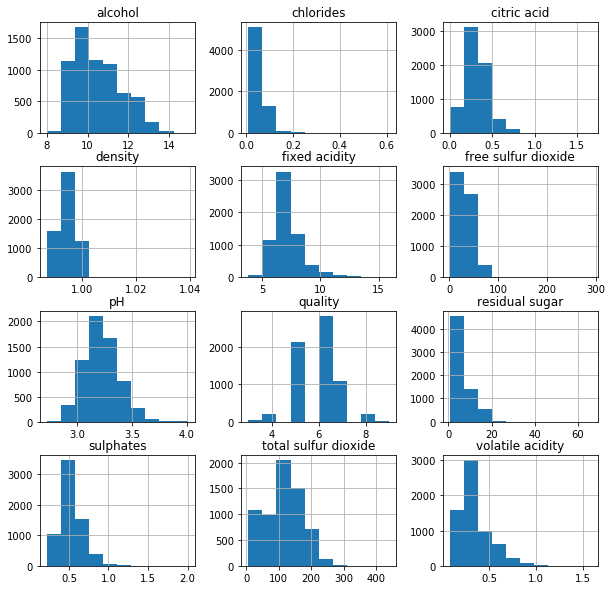

In [61]:
df.hist(figsize=(10,10));
# 固定酸度、pH 值、酒精度

- 根据质量对不同特征变量的散点图，以下哪个最有可能对质量产生积极的影响？_挥发性酸度、残糖、pH 值、酒精度

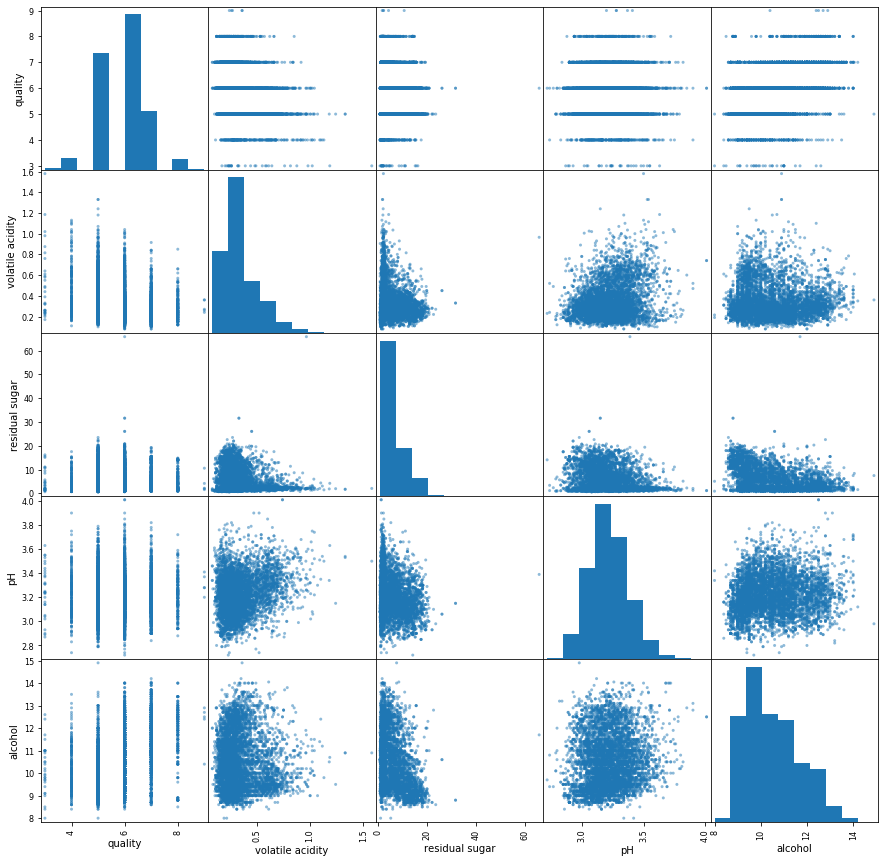

In [30]:
pd.plotting.scatter_matrix(df[['quality','volatile acidity','residual sugar','pH','alcohol']],figsize=(15,15));
# 酒精度

# 4.得出结论

##   问题 1：某种类型的葡萄酒（红葡萄酒或白葡萄酒）是否代表更高的品质？

    - 对于此问题，将红葡萄酒的平均质量与白葡萄酒的平均质量等级进行比较。要这样做，先按颜色分组，然后找到每组的平均质量等级。

In [34]:
df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

## 问题 2：哪个水平的酸度（pH 值）获得的平均评级最高？
- 这个问题比较棘手，因为不同于颜色有明确的分类可以分组（红葡萄酒和白葡萄酒），pH 值是一个没有明确类别的定量变量。但是，有一个简单的解决方案。你可以通过创建自己的类别，从定量变量创建一个分类变量。Pandas 的 cut 函数可以让你将数据"切分"为组。你可以使用它，创建具有以下类别的名为acidity_levels的新列:
## 酸度水平:  

  - 高: 最低 25% 时的 pH 值
  - 中等偏高: 25% - 50% 时的 pH 值
  - 中: 50% - 75% 时的 pH 值
  - 低: 最高 75% 时的 pH 值

- 在这里，数据在 25%、50% 和 75% 三个百分比处做了拆分。记住，你可以使用 Pandas 的 describe() 函数获得这些数字！创建这四个类别后，你可以使用 groupby 获得每个酸度水平的平均质量评级。

In [36]:
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [40]:
def foo(x):
    if x<=3.110000:
        return '高'
    if x<=3.210000:
        return '中等偏高'
    if x<=3.320000:
        return '中'
    return '低'
mm=df['pH'].map(foo)
mm.head()

0       低
1    中等偏高
2       中
3    中等偏高
4       低
Name: pH, dtype: object

In [58]:
binss=[0,3.110000,3.210000,3.320000,5]
df['acidity_levels']=pd.cut(df['pH'],bins=binss,labels=['高','中等偏高','中','低'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,低
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,中等偏高
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,中
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,中等偏高
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,低


In [59]:
df.groupby('acidity_levels')['quality'].mean()

acidity_levels
高       5.783469
中等偏高    5.784540
中       5.850832
低       5.859593
Name: quality, dtype: float64

## 问题 3：酒精含量越高的葡萄酒获得的评级更高吗？ 
    
要回答这个问题，请使用 query 创建两组葡萄酒样本:

    - 低酒精（酒精含量低于中值的样本）
    - 高酒精（酒精含量高于或等于中值的样本）

然后，找到每组的平均质量评级。

In [83]:
df['alcohol'].median()

10.3

In [85]:
df_low=df.query('alcohol<10.300000')
df_high=df.query('alcohol>=10.300000')
(df_low.quality.mean(),df_high.quality.mean())

(5.475920679886686, 6.146084337349397)

## 问题 4：更甜的葡萄酒（残糖更多）获得的评级更高吗？ 
同样，使用中值按残糖将样本分为两组，并找出每组的平均质量评级。

In [102]:
df['residual sugar'].median()

3.0

In [103]:
# x=df['residual sugar'].median()
df_low=df.query('`residual sugar`<3.0')
df_high=df.query('`residual sugar`>=3.0')
(df_low.quality.mean(),df_high.quality.mean())

(5.808800743724822, 5.82782874617737)

## 得出结论：
- 1.红葡萄酒的平均质量小于白葡萄酒的平均质量
- 2.低水平的酸度获得最高的平均评级
- 3.酒精含量越高的葡萄酒获得的评级更高
- 4.更甜的葡萄酒获得的评级更高

# 5.可视化展示

In [162]:
contts_index=df.groupby(['quality'])['chlorides'].count()
contts_index.index

Int64Index([3, 4, 5, 6, 7, 8, 9], dtype='int64', name='quality')

In [202]:
counts=df.groupby(['quality','color'])['chlorides'].count()
counts


quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: chlorides, dtype: int64

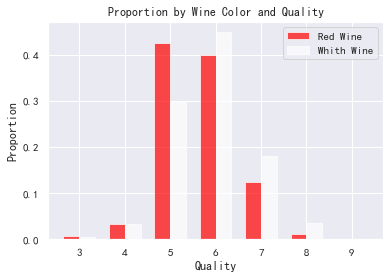

In [285]:
# plt.figure(figsize=(7,4),dpi=80 )
x1=counts[:,'red'].index
x2=counts[:,'white'].index
y1=counts[:,'red'].values/sum(counts[:,'red'].values)
y2=counts[:,'white'].values/sum(counts[:,'white'].values)
bar_width=0.35
plt.bar(x1,y1,bar_width,color='red',alpha=.7,label='Red Wine')
plt.bar(x2+bar_width,y2,bar_width,color='w',alpha=.7,label='Whith Wine')

plt.legend()
plt.title('Proportion by Wine Color and Quality')
plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.xticks(x2+bar_width/2,x2)
plt.show()